In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Libraries imported.


In [2]:
!pip3 install requests beautifulsoup4 




In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
raw_data = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle")
soup = BeautifulSoup(raw_data.content,'lxml')
table = soup.find_all('table')[0] 
seattle = pd.read_html(str(table))[0]
seattle



,Unnamed: 0,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
0,1,North Seattle,Seattle,Various,NaN,NaN,NaN,North of the Lake Washington Ship Canal[42]
1,2,Broadview,North Seattle[42],1954[43],NaN,NaN,NaN,[44]
2,3,Bitter Lake,North Seattle[42],1954[43],NaN,NaN,NaN,[45]
3,4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",NaN,NaN,NaN,[46]
4,5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",NaN,NaN,NaN,[48]
5,6,Greenwood,North Seattle[42],"1891,[43] 1954[43]",NaN,NaN,NaN,[49]
6,7,Northgate,North Seattle[42],various 1891-1954[43],NaN,NaN,NaN,[50]
7,8,Haller Lake,Northgate[50],1954[43],NaN,NaN,NaN,[51]
8,9,Pinehurst,Northgate[50],1953[43],NaN,NaN,NaN,[52]
9,10,North College Park (Licton Springs),Northgate[50],"1950, 1954[43]",NaN,NaN,NaN,[53]


In [5]:
seattle_data = seattle[['Within larger district','Neighborhood name']]

seattle_data


,Within larger district,Neighborhood name
0,Seattle,North Seattle
1,North Seattle[42],Broadview
2,North Seattle[42],Bitter Lake
3,North Seattle[42],North Beach / Blue Ridge
4,North Seattle[42],Crown Hill
5,North Seattle[42],Greenwood
6,North Seattle[42],Northgate
7,Northgate[50],Haller Lake
8,Northgate[50],Pinehurst
9,Northgate[50],North College Park (Licton Springs)


In [6]:
# new data frame from cities in washignton with split value columns
new = seattle_data["Within larger district"].str.split("/", n = 1, expand = True)
  
# making separate first name column from new data frame
seattle_data["District"]= new[0]
  
# making separate last name column from new data frame
seattle_data["num"]= new[1]
  
# Dropping old Name(Latitude/Longitude) columns
seattle_data.drop(columns =["Within larger district"], inplace = True)
  
# data frame display
seattle_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Neighborhood name,District,num
0,North Seattle,Seattle,None
1,Broadview,North Seattle[42],None
2,Bitter Lake,North Seattle[42],None
3,North Beach / Blue Ridge,North Seattle[42],None
4,Crown Hill,North Seattle[42],None
5,Greenwood,North Seattle[42],None
6,Northgate,North Seattle[42],None
7,Haller Lake,Northgate[50],None
8,Pinehurst,Northgate[50],None
9,North College Park (Licton Springs),Northgate[50],None


In [7]:
# new data frame from cities in washignton with split value columns
new_1 = seattle_data["District"].str.split("[", n = 1, expand = True)
  
# making separate first name column from new data frame
seattle_data["Districts"]= new_1[0]
  
# making separate last name column from new data frame
seattle_data["num1"]= new_1[1]
  
# Dropping old Name(Latitude/Longitude) columns
seattle_data.drop(columns =["District",'num'], inplace = True)
  
# data frame display
seattle_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Neighborhood name,Districts,num1
0,North Seattle,Seattle,None
1,Broadview,North Seattle,42]
2,Bitter Lake,North Seattle,42]
3,North Beach / Blue Ridge,North Seattle,42]
4,Crown Hill,North Seattle,42]
5,Greenwood,North Seattle,42]
6,Northgate,North Seattle,42]
7,Haller Lake,Northgate,50]
8,Pinehurst,Northgate,50]
9,North College Park (Licton Springs),Northgate,50]


In [8]:
# new data frame from cities in washignton with split value columns
new_2 = seattle_data["Neighborhood name"].str.split("/", n = 1, expand = True)
  
# making separate first name column from new data frame
seattle_data["Neighborhood"]= new_2[0] 
  
# making separate last name column from new data frame
seattle_data["num2"]= new_2[1]
  
# Dropping old Name(Latitude/Longitude) columns
seattle_data.drop(columns =["Neighborhood name",'num1'], inplace = True)
  
# data frame display
seattle_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Districts,Neighborhood,num2
0,Seattle,North Seattle,None
1,North Seattle,Broadview,None
2,North Seattle,Bitter Lake,None
3,North Seattle,North Beach,Blue Ridge
4,North Seattle,Crown Hill,None
5,North Seattle,Greenwood,None
6,North Seattle,Northgate,None
7,Northgate,Haller Lake,None
8,Northgate,Pinehurst,None
9,Northgate,North College Park (Licton Springs),None


In [9]:
# new data frame from cities in washignton with split value columns
new_3 = seattle_data["Neighborhood"].str.split("[", n = 1, expand = True)
  
# making separate first name column from new data frame
seattle_data["Neighborhoods"]= new_3[0] 
  
# making separate last name column from new data frame
seattle_data["num3"]= new_3[1]
  
# Dropping old Name(Latitude/Longitude) columns
seattle_data.drop(columns =["Neighborhood",'num2'], inplace = True)
  
# data frame display
seattle_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Districts,Neighborhoods,num3
0,Seattle,North Seattle,None
1,North Seattle,Broadview,None
2,North Seattle,Bitter Lake,None
3,North Seattle,North Beach,None
4,North Seattle,Crown Hill,None
5,North Seattle,Greenwood,None
6,North Seattle,Northgate,None
7,Northgate,Haller Lake,None
8,Northgate,Pinehurst,None
9,Northgate,North College Park (Licton Springs),None


In [10]:
Seattle_Data = seattle_data[['Districts','Neighborhoods']]
Seattle_Data

,Districts,Neighborhoods
0,Seattle,North Seattle
1,North Seattle,Broadview
2,North Seattle,Bitter Lake
3,North Seattle,North Beach
4,North Seattle,Crown Hill
5,North Seattle,Greenwood
6,North Seattle,Northgate
7,Northgate,Haller Lake
8,Northgate,Pinehurst
9,Northgate,North College Park (Licton Springs)


In [11]:
Seattle_Data.shape

(127, 2)

##### Creating the dataframe which will contain latitude and longitude data



In [12]:
# define the dataframe columns
column_names = ['Districts', 'Neighborhoods', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

neighbors

,Districts,Neighborhoods,Latitude,Longitude


In [13]:
district = Seattle_Data['Districts']
name = Seattle_Data['Neighborhoods']
location = None
latitude = None
longitude = None

for data in range(0, len(district)):
    dt = district[data]
    nm = name[data]
    
    geolocator = Nominatim(user_agent="sandra's-application")
    location = geolocator.geocode('{}'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    neighbors = neighbors.append({ 'Districts':dt,'Neighborhoods':nm,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

In [14]:
neighbors
s_neighbors = neighbors.loc[0:126]
s_neighbors.head()


,Districts,Neighborhoods,Latitude,Longitude
0,Seattle,North Seattle,47.603832,-122.330062
1,North Seattle,Broadview,47.590055,-122.291455
2,North Seattle,Bitter Lake,47.590055,-122.291455
3,North Seattle,North Beach,47.590055,-122.291455
4,North Seattle,Crown Hill,47.590055,-122.291455


In [16]:
seattle_neighbors= s_neighbors[['Districts','Neighborhoods','Latitude','Longitude']]
seattle_neighbors


,Districts,Neighborhoods,Latitude,Longitude
0,Seattle,North Seattle,47.603832,-122.330062
1,North Seattle,Broadview,47.590055,-122.291455
2,North Seattle,Bitter Lake,47.590055,-122.291455
3,North Seattle,North Beach,47.590055,-122.291455
4,North Seattle,Crown Hill,47.590055,-122.291455
5,North Seattle,Greenwood,47.590055,-122.291455
6,North Seattle,Northgate,47.590055,-122.291455
7,Northgate,Haller Lake,39.256792,-84.589882
8,Northgate,Pinehurst,39.256792,-84.589882
9,Northgate,North College Park (Licton Springs),39.256792,-84.589882


In [18]:
geolocator = Nominatim(user_agent="sandra's-application")
location = geolocator.geocode('Seattle')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Seattle are 47.6038321, -122.3300624.


In [19]:
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(seattle_neighbors['Latitude'], seattle_neighbors['Longitude'], seattle_neighbors['Districts']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [20]:
CLIENT_ID = 'EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5' #  Foursquare ID
CLIENT_SECRET = 'PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5
CLIENT_SECRET:PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA


In [21]:
seattle_neighbors.loc[1, 'Districts']

'North Seattle'

In [23]:
neighborhood_latitude = seattle_neighbors.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = seattle_neighbors.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = seattle_neighbors.loc[1, 'Neighborhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Broadview are 47.590054550000005, -122.29145496064257.


In [24]:
search_query = 'venues'
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5&client_secret=PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA&v=20180605&ll=47.590054550000005,-122.29145496064257&radius=1000&limit=100'

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e4334be001b23e7f08f1b5'},
 'response': {'headerLocation': 'Mount Baker',
  'headerFullLocation': 'Mount Baker, Seattle',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 29,
  'suggestedBounds': {'ne': {'lat': 47.59905455900002,
    'lng': -122.27813527215608},
   'sw': {'lat': 47.58105454099999, 'lng': -122.30477464912906}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55577a63498ea920be026f20',
       'name': 'QED Coffee',
       'location': {'address': '1418 31st Ave S',
        'lat': 47.589677274544194,
        'lng': -122.29235845256639,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.589677274544194,
          'lng': -122.29235845256639}],
        'distance': 79,
        'postalCode': '9

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,QED Coffee,55577a63498ea920be026f20,Coffee Shop,47.589677,-122.292358
1,Colman Park,4d850d5599b78cfa5127c61f,Park,47.586151,-122.287638
2,Heyday,55e9022a498e5ccf0f8ee045,New American Restaurant,47.590477,-122.292367
3,That's Amore Italian Cafe,459ea327f964a520bc401fe3,Italian Restaurant,47.589577,-122.292576
4,Amy Yee Tennis Center,4b2aeb46f964a52016b224e3,Gym / Fitness Center,47.584255,-122.297900
5,Sam Smith Park,475f1b85f964a520db4c1fe3,Park,47.590160,-122.298195
6,Mount Baker Beach,4c2be025d1a10f47a5b0f864,Beach,47.583241,-122.287276
7,Northwest African American Museum,4c13e6c1583c9c7477833fa4,Museum,47.589010,-122.301501
8,Judkins Park and Playfield,4ac14ba2f964a5209e9620e3,Park,47.593099,-122.303482
9,Blue Dog Pond Park,4b4f56aef964a520fb0127e3,Dog Run,47.588726,-122.298850


In [28]:
#fix the column names

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,QED Coffee,55577a63498ea920be026f20,Coffee Shop,47.589677,-122.292358
1,Colman Park,4d850d5599b78cfa5127c61f,Park,47.586151,-122.287638
2,Heyday,55e9022a498e5ccf0f8ee045,New American Restaurant,47.590477,-122.292367
3,That's Amore Italian Cafe,459ea327f964a520bc401fe3,Italian Restaurant,47.589577,-122.292576
4,Amy Yee Tennis Center,4b2aeb46f964a52016b224e3,Gym / Fitness Center,47.584255,-122.297900
5,Sam Smith Park,475f1b85f964a520db4c1fe3,Park,47.590160,-122.298195
6,Mount Baker Beach,4c2be025d1a10f47a5b0f864,Beach,47.583241,-122.287276
7,Northwest African American Museum,4c13e6c1583c9c7477833fa4,Museum,47.589010,-122.301501
8,Judkins Park and Playfield,4ac14ba2f964a5209e9620e3,Park,47.593099,-122.303482
9,Blue Dog Pond Park,4b4f56aef964a520fb0127e3,Dog Run,47.588726,-122.298850


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
seattle_venues = getNearbyVenues(names=neighbors['Districts'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

Seattle
North Seattle
North Seattle
North Seattle
North Seattle
North Seattle
North Seattle
Northgate
Northgate
Northgate
Northgate
North Seattle
Lake City
Lake City
Lake City
Lake City
Lake City
North Seattle
North Seattle
North Seattle
North Seattle
North Seattle
North Seattle
North Seattle
Windermere
North Seattle
North Seattle
Ravenna
North Seattle
Lake Union 
North Seattle
North Seattle
North Seattle
North Seattle
Ballard
Ballard
Ballard
Ballard
Ballard
Seattle
Central Seattle
Magnolia
Magnolia
Magnolia
Central Seattle
Central Seattle
Queen Anne
Queen Anne
Queen Anne
Queen Anne
Central Seattle
Capitol Hill
Capitol Hill
Capitol Hill 
Capitol Hill
Capitol Hill
Capitol Hill 
Capitol Hill 
Capitol Hill 
Capitol Hill
Madison Park
North Seattle 
Lake Union
South Lake Union
Lake Union
Lake Union
Central Seattle
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Central Seattle
Central Area
Central Area
Minor
Central Area
Atlantic
Central Area
Madron

In [31]:
print(seattle_venues.shape)
seattle_venues.head()

(7505, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Seattle,47.603832,-122.330062,Smith Tower Observation Bar,47.602012,-122.331793,Cocktail Bar
1,Seattle,47.603832,-122.330062,Columbia Tower Club,47.604507,-122.330484,Social Club
2,Seattle,47.603832,-122.330062,Tat's Delicatessen,47.601901,-122.332423,Sandwich Place
3,Seattle,47.603832,-122.330062,Flatstick Pub,47.600143,-122.331002,Mini Golf
4,Seattle,47.603832,-122.330062,Metropolitan Grill,47.604617,-122.334280,Steakhouse


In [32]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Atlantic,12,12,12,12,12,12
Ballard,500,500,500,500,500,500
Beacon Hill,400,400,400,400,400,400
Capitol Hill,500,500,500,500,500,500
Capitol Hill,400,400,400,400,400,400
Central Area,108,108,108,108,108,108
Central Seattle,570,570,570,570,570,570
Delridge,133,133,133,133,133,133
Downtown,1000,1000,1000,1000,1000,1000


In [33]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 276 uniques categories.


In [34]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,National Park,New American Restaurant,Newsagent,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Snack Place,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Seattle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
seattle_onehot.shape

(7505, 277)

In [36]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,National Park,New American Restaurant,Newsagent,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Snack Place,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Atlantic,0.000000,0.00,0.000000,0.00,0.166667,0.00,0.00,0.000000,0.00,0.000000,

In [37]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Atlantic----
                     venue  freq
0      American Restaurant  0.17
1              Gas Station  0.08
2        Convenience Store  0.08
3  Health & Beauty Service  0.08
4       Mexican Restaurant  0.08


----Ballard----
                venue  freq
0         Coffee Shop  0.10
1        Burger Joint  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4  Mexican Restaurant  0.03


----Beacon Hill----
                  venue  freq
0    Italian Restaurant  0.05
1    Seafood Restaurant  0.04
2  Gym / Fitness Center  0.04
3                Bakery  0.04
4     French Restaurant  0.03


----Capitol Hill----
            venue  freq
0      Food Truck  0.09
1  Sandwich Place  0.04
2            Park  0.04
3     Pizza Place  0.03
4      Art Museum  0.03


----Capitol Hill ----
            venue  freq
0      Food Truck  0.09
1  Sandwich Place  0.04
2            Park  0.04
3     Pizza Place  0.03
4      Art Museum  0.03


----Central Area----
               venue  freq
0  Mobile Ph

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic,American Restaurant,Dance Studio,Music Venue,Gas Station,Convenience Store,Diner,Shipping Store,Mexican Restaurant,Gym / Fitness Center,Health & Beauty Service
1,Ballard,Coffee Shop,Burger Joint,Ice Cream Shop,Bakery,Mexican Restaurant,Thai Restaurant,Sandwich Place,Vietnamese Restaurant,Pizza Place,Pet Store
2,Beacon Hill,Italian Restaurant,Seafood Restaurant,Bakery,Gym / Fitness Center,Park,Spa,Sandwich Place,Hotel,Pizza Place,Coffee Shop
3,Capitol Hill,Food Truck,Sandwich Place,Park,Pizza Place,American Restaurant,Art Museum,History Museum,Science Museum,Museum,Deli / Bodega
4,Capitol Hill,Food Truck,Sandwich Place,Park,Pizza Place,American Restaurant,Art Museum,History Museum,Science Museum,Museum,Deli / Bodega


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [41]:

max_range = 8

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = seattle_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

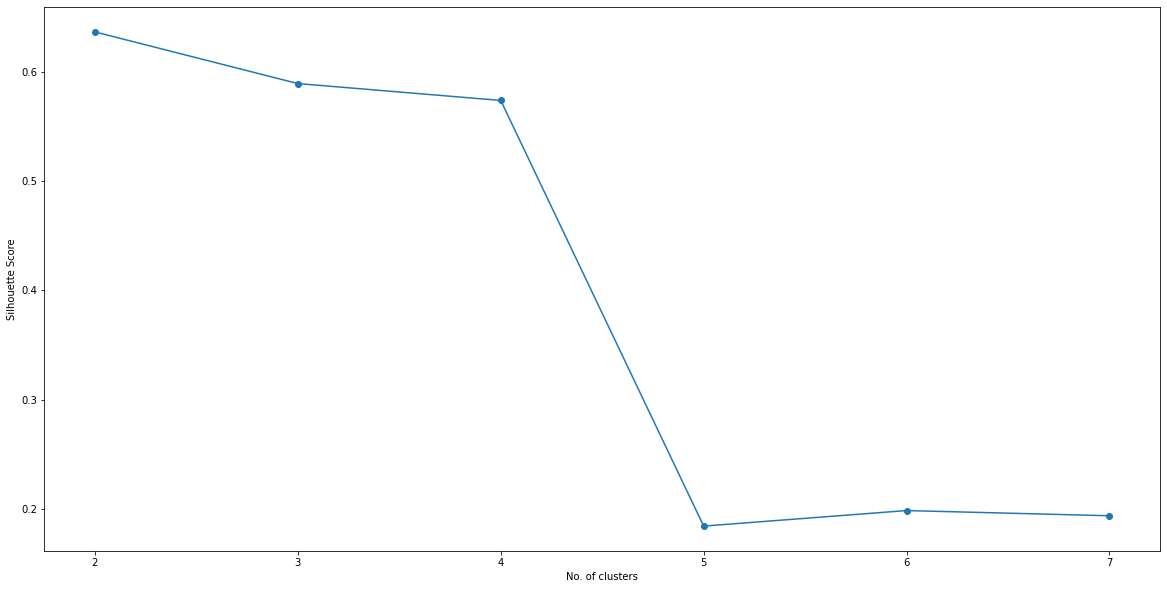

In [42]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [45]:
# run k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [53]:
neighbors.rename(columns={'Neighborhoods':'Area'}, inplace=True)
a= neighbors.loc[0:126]
b = a[['Districts','Area','Latitude','Longitude']]
b.head()
b.rename(columns={'Districts':'Neighborhood'}, inplace=True)
b.head()


,Neighborhood,Area,Latitude,Longitude
0,Seattle,North Seattle,47.603832,-122.330062
1,North Seattle,Broadview,47.590055,-122.291455
2,North Seattle,Bitter Lake,47.590055,-122.291455
3,North Seattle,North Beach,47.590055,-122.291455
4,North Seattle,Crown Hill,47.590055,-122.291455


In [75]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = b

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged= seattle_merged.dropna(subset = ['Cluster Labels'])
seattle_merged

seattle_merged['Cluster Labels'] = seattle_merged['Cluster Labels'].astype('int')
seattle_merged

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seattle,North Seattle,47.603832,-122.330062,0,Coffee Shop,Hotel,Italian Restaurant,Seafood Restaurant,Sushi Restaurant,Cocktail Bar,Chinese Restaurant,Dumpling Restaurant,Donut Shop,Breakfast Spot
1,North Seattle,Broadview,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
2,North Seattle,Bitter Lake,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
3,North Seattle,North Beach,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
4,North Seattle,Crown Hill,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
5,North Seattle,Greenwood,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
6,North Seattle,Northgate,47.590055,-122.291455,0,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
7,Northgate,Haller Lake,39.256792,-84.589882,0,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall
8,Northgate,Pinehurst,39.256792,-84.589882,0,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall
9,Northgate,North College Park (Licton Springs),39.256792,-84.589882,0,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall


In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [79]:

seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seattle,Coffee Shop,Hotel,Italian Restaurant,Seafood Restaurant,Sushi Restaurant,Cocktail Bar,Chinese Restaurant,Dumpling Restaurant,Donut Shop,Breakfast Spot
1,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
2,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
3,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
4,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
5,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
6,North Seattle,Park,Scenic Lookout,Trail,Pier,Spa,Skate Park,Bus Stop,Museum,New American Restaurant,French Restaurant
7,Northgate,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall
8,Northgate,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall
9,Northgate,Fried Chicken Joint,Diner,Automotive Shop,Seafood Restaurant,Convenience Store,Mobile Phone Shop,Big Box Store,Liquor Store,Men's Store,Shopping Mall


In [80]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
86,Washington Park,Convenience Store,Yoga Studio,Filipino Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market


In [81]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Ravenna,Hotel,Dog Run,Yoga Studio,Field,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [82]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
80,Minor,Convenience Store,Ski Area,Yoga Studio,Fast Food Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Field
